<h1 style="text-align: center;">Individual-based Simulation Models of Public Health</h1>

<p style="text-align: center;">James Collins</p>
<p style="text-align: center;">July 25, 2019</p>

Hi everyone.  

My name is ...

Today I'll be talking about TITLE. In particular, I'll be talking about the process of simulation modeling and implementation.

I prefer an open style of presentations, so feel free to stop me at any time if you have questions.

# The Simulation Science Team

I lead the engineering efforts on the simulation science team. What we do, in many ways, is similar to what happens on many other teams throughout the institute: public health modeling.

**Slide**

In particular, we try to analyze the impacts of interventions on health systems. We look at outcomes like the change in disease burden, risk exposure, and the health system costs.

**Slide**

I like to always keep in mind why we're doing what we do because it helps guide model development. 

We try to provide an agenda-free evidence base for people trying to make hard decisions.  Decisions like which studies to fund, which intervention programs to roll out, and sometimes where there are important data gaps that should be filled.

**Slide**

We produce this evidence using computer simulations of health systems.

I'm not going to go much in to the intervention side of things today. 
If you join us next week, for Nathaniel's presentation, he'll dive into some detail about one of our recent simulation models and show you some results.  

Instead, I'm going to talk more generally about the modeling process and how our models are implemented.  

Let's start with a simple question:

- **What we do**: Analyze the impacts of interventions on population health and health systems.

- **Why we do it**: To give policy and decision makers evidence for intervention comparisons.

- **How we do it**: Computer simulations!

# What is Simulation?

What is a simulation?

No, seriously. Simulation is a kind of field that defies easy definition. What do you all think?  

<img src="images/astronaut.png" style="display: block; margin-left: auto; margin-right: auto; width: 30%">

This is one of my favorite examples of simulation. Here you see an astronaut training for space walk missions in his space suit underwater.  

One of the reasons people do simulations is when the actual system is somehow hard to measure or interact with.  

This is an example of a physical simulation of a real system.  It's also an example of a human-in-the-loop simulation, which means that some part of the evolution of the system is due to unmodeled human behavior.

<img src="images/flight-sim.jpg" style="display: block; margin-left: auto; margin-right: auto; width: 30%">


Another common example are training flight simulators. The museum of flight has a cool one that I definitely recommend.  

This is a hybrid computer/physical simulation where a great deal of modeling is done on the computational side while still providing the pilot with realistic flight controls.


<img src="images/typhoon.gif" style="display: block; margin-left: auto; margin-right: auto; width: 30%">


Here's an example of something considerably closer to what we do.  This is a simulation of typhoon Mawar in 2005. It's a purely computational simulation of an actual weather event.  It's driven by data and mathematical models of pressure, temperature, currents, and many other things.

The simulations we produce are also purely computational simulations, so we're going to focus in on what that process typically looks like.

<img src="images/sim_flow1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Computational Simulation is a complex process, but let's look at a simplified version of how this might go (and one that coincidentally mirrors how my team works).

We'll talk through this process at a high level first, and then dive into some details.

<img src="images/sim_flow2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">


Computational simulation pretty much always starts with a real world system. 

To carry us through here, let's think about the world of global health: how people are born and die, how much disability they experience, and how their interactions with the health system, infrastructure, transportation, marketing, etc, shape their health outcomes.

<img src="images/sim_flow3.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Meanwhile, diligent scientists and doctors and buereaucrats and college students are out collecting data about all these interactions with experiments and observational studies and surveys, building their own models and writing papers.

<img src="images/sim_flow4.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Here at the institute, we're gathering all that data through our worldwide collaborator network, you all are extracting, cleaning, and labeling that data, and using your own statistical models and simulations to produce descriptive and predictive outputs about disease prevalence and risk exposure and mortality and health expenditure.

And seriously, thanks. My work would be totally impossible without all the work you all do.

<img src="images/sim_flow5.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Meanwhile, in this **definitely apochryphal** overview, Chris Murray says he wants to be able to count how many hamburgers a kid eats, see if they really do brush their teeth when their parents tell them to, and determine whether giving them an egg every day will make them healthier.  

More seriously, we wanted to take all this incredible descriptive analysis available from the GBD and try to make models of how interventions like new vaccines, different medication schedules, and yes, giving kids eggs every day, could alter population health outcomes. 

These are complex questions because they really do depend on things like how many healthcare facilities are nearby, how heterogenous the population is with respect to risk exposure and disease prevalence, and how those things all relate to each other. 

We decided early on to use a modeling paradigm using discrete-time, individual-based, Monte Carlo simulations. We'll come back to that in a bit. The important part is that this is a reasonably common modeling strategy for intervention analysis. 

The models are still difficult to put together, but we had a few pilot models in mind (a model of vaccines for diarrheal diseases and a model for opportunistic screening of blood pressure followed by a prescription program).

<img src="images/sim_flow6.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Knowing that this was a common modeling paradigm for intervention analysis, we went out looking for tools.  Don't reinvent the wheel if you don't have to is probably the best piece of programming advice I can give you.  

We had several major considerations, but two important ones were whether we could leverage all the data produced in the GBD and whether the tool was flexible enough to support a variety of models and interventions. 

After several months we came to the sad (but fortuitous for me!) decision that the easiest thing to do would be to build our own. This is always a dangerous proposition. 

There are thousands of hyper-specific, probably incorrect individual-based models programmed by beleagured grad students floating around on hard drives and academic servers and, occassionally, on github.  

Building good software is hard, and a very different skill from building good public health models. Luckily the team hired an incredibly deft engineer named Alec Deason and he single-handedly built out a great deal of the infrastructure at the heart of our current software ecosystem.

<img src="images/sim_flow7.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">


There are other important aspects of computational modeling that I'm going to gloss over a bit here. 

Importantly, the model by itself is something we can reason about and make predictions from. It is usually made of math equations, flow charts and diagrams, and narrative descriptions. The predictions we make from the vital in validation of our implementations.  

Additionally, the production of observations from the executable models is also delicate work that we spend a lot of time on.  For our purposes, we'll pretend it's a trivial task and that we have immediate access to everything in the simulation.  

<img src="images/sim_flow8.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">


We're going to focus down on this section of model and talk in more detail about how my team does model development and implementation.  Let's re-orient.

<img src="images/modeling1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">


So we've squashed some of our boxes and bubbles here.  The previous diagram is a bit idealized at the start of a complex project. Model building and implementation are typically moving hand in hand early on as we figure out what's feasible and what's not.

When we first got started, everything was incredibly labor intensive. Our first models took more than a year to produce. We didn't know yet exactly what was going on. We didn't understand our data sources. 

We built a bunch of prototypes and throw them away. We built more prototypes, and a few stuck.  

One of the key problems early on is a lack of a common language for talking about models and their implementations. For those of you who've only come into a well established modeling project, you may one day find that all this jargon we use takes lots of intentional effort to create. And it's one of the most vital things to the success of a project.

<img src="images/modeling2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">


Here's a picture that more closely describes our current process.

We now build 4-6 models concurrently with turnaround times of 2-6 months, depending on the complexity of the research questions and of the real world systems we're trying to model. 

The key piece of this improvement was creating a clear (but porous) boundary between the model development process and the model implementation process. Then we focused (and are continuing to focus) on communication and developing a common language. This common language is built around categories and patterns we've found in previous models and their implementations. 

On the model building side, this language is formalized in templates and procedures and requirements documents full of diagrams. On the model implementation side, this looks like software abstractions that mirror the modeling language. 

As my purview is mostly engineering, I'm going to focus us in particularly on the software and model implementation side for the rest of this talk. 

I do want to mention that Christine Allen, one of our former researchers, took a paper on our model development process to a conference this last May that was extremely well recieved. Unlike software development, there are far fewer best practices around model development, and we should all talk a lot more about it.

<h1 style="text-align: center;">Model implementation with <span style="font-family:Courier; color: blue">vivarium</span> and <span style="font-family:Courier; color: blue">vivarium_public_health</span></h1>

I mentioned before that one of the early decisions we made was to build our models using a individual-based, discrete-time, Monte Carlo approach. 

This is a generic modeling approach. And one of Alec's early pieces of wisdom was to separate the modeling approach from the public health aspects. 

As a software library, vivarium itself knows nothing about public health. It's simply a framework for building discrete-time, Monte Carlo simulations. Even the individual-based part of our work is not strictly enforced by vivarium itself.

This has made the library incredibly stable over time. Stability is vital in research software.  It reduces error rates, makes systems easier to reason about, and makes reproducible research much, much easier.

All the public health behavior is captured in a toolbox we've called, aptly, vivarium_public_health. 

Despite this separation between the modeling paradigm and public health, I'm going to use a public health model to talk through what a simulation actually looks like because I find it much easier to understand a concrete example.

<h1 style="text-align: center;">So what is a <span style="font-family:Courier; color: blue">vivarium</span> simulation?</span></h1>

Let's dig in. So what is a vivarium simulation?

... just kidding.  

It's my job to tell you this time.

<img src="images/simulation.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

A vivarium simulation is a series of time steps.  

Let's think about a simulating a bunch of people. I've represented them two ways here.  

Beautiful, realistic portraits of individuals and the big abstact letter X.  Both of them are representations of the **state** of the simulation.  

The state of the simulation is not the same as the state of an individual. Rather it is the combined state of all individuals.  

In our pictoral representation it's a column of stick figures and tombstones.  In our mathematical representation, it's a vector of, say, 1s and 0s with all the living people represented by 1s. 

The simulation produces a trajectory of the state over time and the model gives us rules for how that state changes each time step.

In practice, each individual has many attributes such as age and sex and whether they're sick, which makes X a matrix instead of a vector.  In the matrix, each row represents an individual and each column represents an attribute. All individuals share the same set of attributes.

All the discrete time moniker means is that time proceeds in discrete chunks of a pre-determined size.

Let's go a little deeper then.  What exactly is a time step?

<img src="images/timestep.png" style="display: block; margin-left: auto; margin-right: auto; width: 80%">

  
Notice the little x here.  I've zoomed down to a single person (or row in our state matrix).  

Our time steps work essentially as a loop over ever person in our simulation.

For every person, we we make a series of decisions.  

<h1 style="text-align: center;">Cool. So what is a decision?</h1>

A decision is the process used to ask and answer questions.  

Some decisions are deterministic. "How much older do I get?" for instance. Well, our time steps are a fixed width, so a person's age increases by the size of the time step as long as they're alive. 

Some questions are harder to answer though. "Do I die?", for instance. Well, maybe. Maybe not. 

For these kinds of questions, we have to turn to some early 20th century mathematicians.

<img src="images/montecarlo.jpg" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

No seriously. 

The Monte Carlo technique is named for the casino in Monaco. 

Much of the development of Monte Carlo techniques was done by mathematicians working on or around the Manhattan Project. Since the work was secret, it needed a code name, and one of the mathematicians had an uncle who liked to visit the Monte Carlo museum.  

So.  Ya know.  Naming is hard.

So how does the Monte Carlo technique work?

<img src="images/decision1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

Surprisingly, it's pretty straightforward. 

We have a question and likely we have some data we can bring to bear to help answer that question. 

We use those two to create a probability that the thing happens. This is not a distribution, but an actual number between 0 and 1. 

We then do some computer magic to get a random number to "sample" that probability and determine our answer.

Okay, so I'm being a little glib and hand-wavy here. Let's look at a concrete example.

<img src="images/decision2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

We have a question: does the individual die sometime in the next time step.  

We also have all this marvelous GBD data about mortality. 

We go to our survival analysis text books (ask Drew if you need a copy) and find a precise mathematical way to ask our question: 

What is the probability that the time of my death is within the next time step given that it's definitely after right now? 

It even has a nice math equation using our data if we're careful about our assumptions. 

Then we ask the computer for a uniform random number between 0 and 1.  If it's less than our calculated probability, the individual dies. If it's more, they don't die.

TADA. That's really all there is to it. It's essentially deciding uncertain things using a weighted coin.



### To quickly recap

Let's recap quickly.

**Slide**

A sim is ...

**Slide**

A time step is ..

**Slide**

A decision is ..

So I want to stop here for a bit and take some questions if you've got them. 

- A **simulation** is a series of **discrete time steps** of a known size.

- A **time step** involves going to each individual and making a series of **decisions**.

- A **decision** is the process for asking and answering a question about what happens to an individual, either deterministically, or with a **Monte Carlo sample** informed by some data and a random number.

<h1 style="text-align: center;">What do our models actually look like?</h1>

Given the sort of framework for modeling we've set up, you may be asking where these decisions come from.  Let's look at that question with some examples.

<img src="images/conceptmodel1.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

This is what we call a Concept Model diagram. It's probably our most frequently used modeling tool. It is a semi-formal depiction of the causal relationships in our models.  

All the way on the right is the demographic model. A demographic model is at the heart of every simulation we produce.  It dictates the shape of our starting population and how the population counts and demographics change over time.

Just to the left we have all the causes that are **explicitly** included in the model.  All other causes of death are tracked implicitly in the mortality component. More on that later.

The arrows between the causes and mortality indicate, we'll a causal relationship between an individual's disease status and their mortality rate.

Next from the right are risk factors **explicitly** included in the model. Here we have two of the child growth failure risks.  Whether or not an individual is experiencing child growth failure changes how likely a person is to have a bout of diarrhea or to get pneumonia. The red arrow between wasting and PEM indicates a PAF of 1 relationships, which is GBD's favorite way of annoying me.  PAF of 1 relationships are special, and sometimes unique, relationships between particular risk factors and causes.

Finally, on the very left we have our fabled egg-a-day intervention with proposed causal effects on stunting and wasting.  

This is on the simpler end of models we've worked on, though it's already much more complex than we have time to dig into. It is a fair representation of the kinds of models we consider though. A comparison between this model and a maternal intervention formed the basis for Derrick Tsoi's ( former sim science pbf) thesis work.

For the remainder of our time, we're going to look at a much simpler model and its constituent parts.

<img src="images/conceptmodel2.png" style="display: block; margin-left: auto; margin-right: auto; width: 70%">

In this model, we've stripped away many things.  There's no intervention here. There's also no fertility model, meaning we'll be working with a closed cohort. However, there is still more than enough here to discuss.

Again, I want to stop a second for questions.  

One thing you'll notice about the nature of the causal diagrams is that they are naturally modular. The public health modeling tools we've built in vivarium mirror this modular structure.  The highest level interface for vivarium simulations is a file we call the model specification file.  It is illustrative to see how this interface mirrors our diagram here.

This specification resolves to python import paths with very similar names to the ones used in our causal diagram.  I'd argue that this is vital to successful scientific software: that the high level interfaces look as close as possible to the language of the model.

We're going to now dig into these pieces of the model to understand how they work.

## Understanding Model Components

Each box in our causal diagram, will typically correspond to one (or sometimes more) components in our implementation of the model.  There are a few key things to keep in mind about how components work.

**Slide**

Attributes are things like the age and sex of individuals, whether they have a particular disease, etc.  
The component that defines those attributes are primarily responsible for three things.

**Slide**

If we think back to our toy diagram of the simulation from earlier, we had a starting state X0.  That state is constructed piecemeal by the components where each component is responsible for filling in the set of columns that correspond to the attributes they manage.

**Slide**

It's almost always easiest to think about this from the perspective of an individual. If we recall our time step diagram, the component describes some subset of the decisions that happen each step.  It's important to note, the particular questions we might ask (or whether we ask them at all) may be dependent on other aspects of the current state.

**Slide**

If we're careful about how we think about our models, this can usually be done at a level of defining relationships between components, which allows us to draw these handy causal diagrams.


- Components are responsible for a small set of **attributes**.  

- Components must **initialize** the attributes at the start of the simulation.  

- Components must define the **decisions** that change those **attributes**.

- Components must define their **relationships** to other **attributes**.

### Demography - Attributes

- age: How old each individual is
- sex: The sex of the each individual
- alive: Whether each individual is alive
- mortality rate: the rate of death of an individual

There are a handful of other attributes as well, such as when an individual enters or exits the simulation. These aren't critical to our discussion though.

### Demography - Initialization

First we'll look at how the demography components initialize the state they're responsible for.

In [1]:
%matplotlib inline
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from vivarium.interface import initialize_simulation_from_model_specification
from vivarium_public_health.dataset_manager import Artifact

sns.set(style='darkgrid')

disease_model_spec = str(Path('.').resolve() / 'disease_model.yaml')
artifact_path = str(Path('.').resolve() / 'artifact.hdf')
a = Artifact(artifact_path)

There's going to be some code here.  I don't expect you to read it all.  I'll point out important things.

We're grabbing some paths and a data artifact, an abstraction we've built around our input data. Model specifications are used by some tools to run simulations and other tools to build the input data artifacts.

In [2]:
def get_pop_data(delta):
    population = a.load('population.structure')
    population = population.reset_index().drop(columns=['age_group_end', 'year_end', 'location'])
    p = population[(population.year_start == 2010 + delta) 
                   & (population.age_group_start >= 40 + delta) 
                   & (population.age_group_start < 100 + delta)]
    
    return p


def plot_pop_data(delta=0):
    p = get_pop_data(delta)
    g = sns.catplot(x='age_group_start', y='value', hue='sex', kind='bar', height=6, aspect=2, data=p)
    g.set_xticklabels(rotation=45)
    plt.show()
    
def plot_pop_sim(s):
    pop = s.get_population()
    pop = pop[pop.alive == 'alive']
    p = get_pop_data(0)
    pop['age_start'] = pd.cut(pop.age, p.age_group_start.unique(), right=False) 
    q = pop.groupby(['age_start', 'sex']).apply(len).reset_index().rename(columns={0: 'value'})
    g = sns.catplot(x='age_start', y='value', hue='sex', kind='bar', height=6, aspect=2, data=q)
    g.set_xticklabels(rotation=45)
    plt.show()

In [3]:
sim = initialize_simulation_from_model_specification(disease_model_spec)
sim.component_manager._components.components = sim.component_manager._components.components[:2] 
sim.configuration.input_data.artifact_path = artifact_path
sim.setup()

/home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py:165: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  pop_data = pd.concat([lower_bin, pop_data, upper_bin]).reset_index()


Here we're setting up a simulation so we can do some comparison. That ugly line second line is just me being lazy about making multiple model specifications.  

In [4]:
sim.get_population().head()

,tracked,entrance_time,age,sex,exit_time,location,alive,years_of_life_lost,cause_of_death
0,True,2010-06-04,45.476411,Male,NaT,Kenya,alive,0.0,not_dead
1,True,2010-06-04,55.243892,Female,NaT,Kenya,alive,0.0,not_dead
2,True,2010-06-04,61.978080,Male,NaT,Kenya,alive,0.0,not_dead
3,True,2010-06-04,76.042078,Male,NaT,Kenya,alive,0.0,not_dead
4,True,2010-06-04,58.979431,Female,NaT,Kenya,alive,0.0,not_dead


Here we can actually see that matrix that we defined before.  We're tracking more thing than I said, but also more things than are present here.  Most components aren't responsible for nearly so much state, but the demography model is tightly integrated and essentially the core of all of our other modeling.

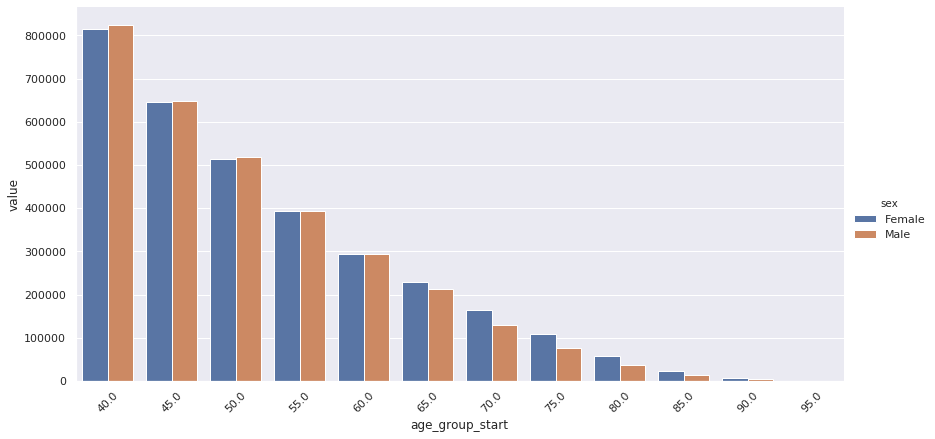

In [5]:
plot_pop_data()

We've initialized a simulation population in 2010 in Kenya.  We're looking at the raw population counts among our target population (40-100 year olds) as modeled by GBD.  I'm not going to go into detail about our specific sampling technique here, that's a whole presentation by itself.  Our goal in demographic initialization is mainly to get a realistic age and sex distribution.

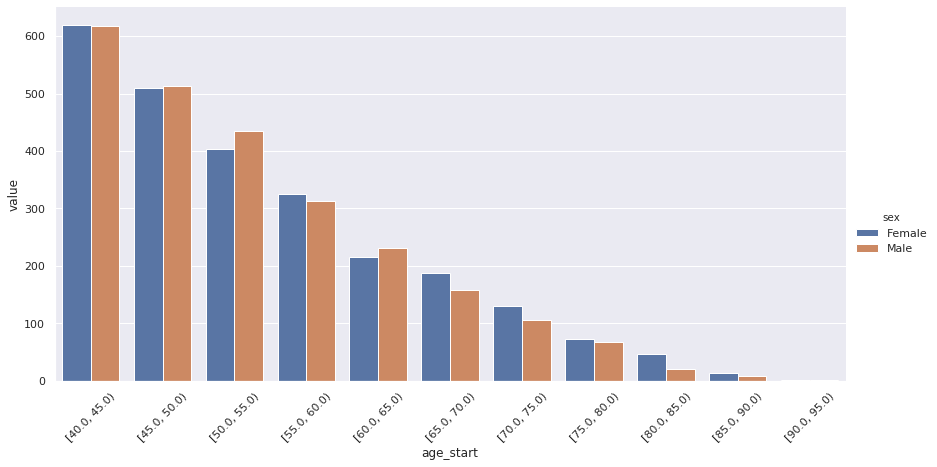

In [6]:
plot_pop_sim(sim)

We're mostly just going to eyeball things here.  We could do more sophisticated tests to make sure we do this correctly, and that's an important part of validation.  Some observations that should be convincing though: 

- The overall trend appears correct.  
- There are more males in the early age groups and more females in the later age groups, consistent with the data.

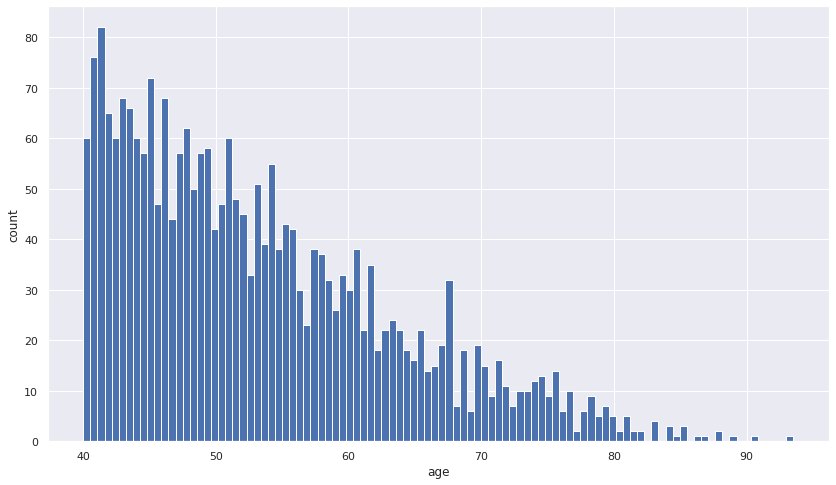

In [7]:
start_pop = sim.get_population()
start_pop[start_pop.sex=='Male'].age.hist(bins=100, figsize=(14, 8))
plt.xlabel('age')
plt.ylabel('count')
plt.show()

One important thing to note, however: we're not just duplicating bin sizes.  We're treating the input data as a distribution and sampling our initial state with ages in a continuum.

In [8]:
start_pop.alive.value_counts()

alive    5000
Name: alive, dtype: int64

Everyone alive at the start, as we expect.

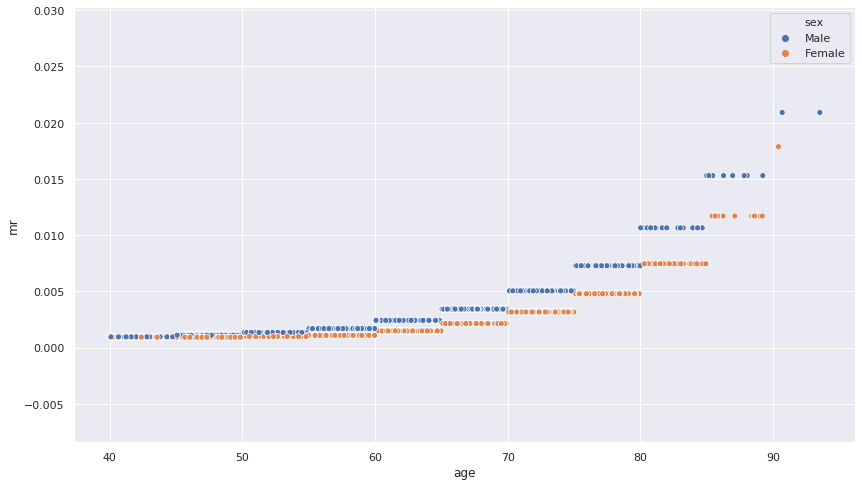

In [9]:
start_pop['mr'] = sim.get_value('mortality_rate')(start_pop.index)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='age', y='mr', hue='sex', data=start_pop)
plt.show()

We have a different way of accessing the mortality rate.  That's important because the mortality rate is one of the attributes that other components will want to alter.  We can see, additionally, that the mortality rates are binned by age and sex. This is because the rate is looked up directly from input data. Vivarium has hooks to allow for other styles of interpolation/disaggregation if desired. 

### Demography - Dynamics

Here we want to see that people get older, and that some people die. Mortality rates may also change, but it's more difficult to have easy expectations about that.  

In [10]:
# sim.step() Take a single step
# sim.take_steps(num_steps) Take a particular number of steps
# sim.run_until(time) Run until a particular date-time
# sim.run_for(time_span) Run for a particular time span

print(sim.clock.time)
sim.run() # Run the full simulation


2010-07-02 00:00:00


66

There are many ways we can run the simulation depending on what we want to investigate.  Here we'll just print the starting time of the simulation and run for the full duration.

**Slide**

We ran for about 5 years.  The sim will run until it's current time crosses some threshold defined in the model specification, but it always takes the same size steps, so sometimes there is overrun.  

In [11]:
sim.clock.time

Timestamp('2015-07-24 00:00:00')

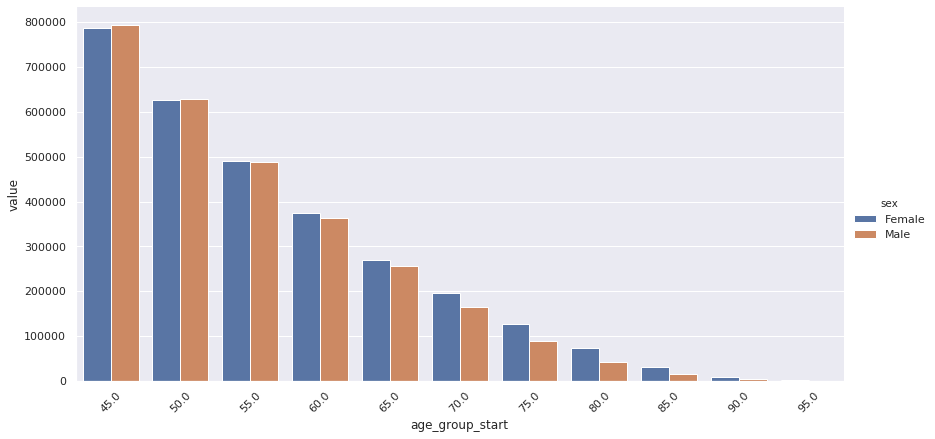

In [12]:
plot_pop_data(5)

We'll compare our populations again. This is typically a pretty excellent validation technique.  

We don't enforce that the population structure continues to match the GBD estimates. We make decisions at the individual level each time step and allow those decisions to dictate how the structure evolves.

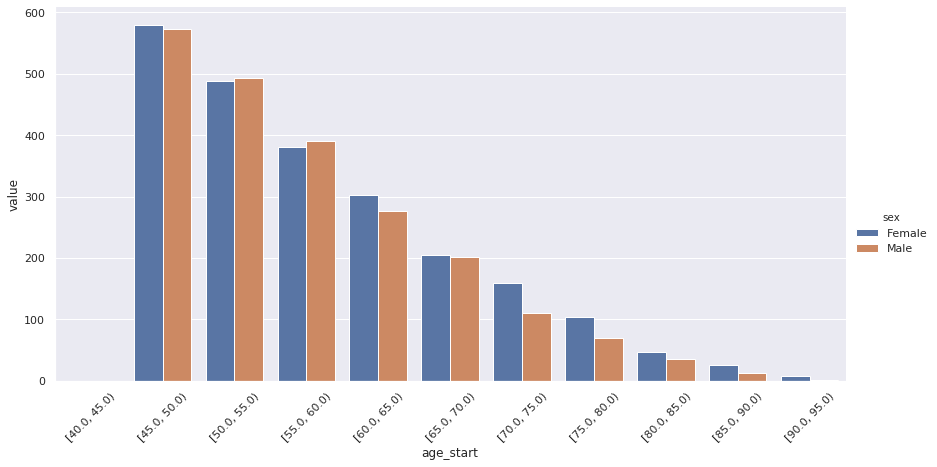

In [13]:
plot_pop_sim(sim)

We still seem to be consistent with overall trends as well as sex trends in the population.

In [14]:
after_pop = sim.get_population()
after_pop.alive.value_counts()

alive    4464
dead      536
Name: alive, dtype: int64

In [15]:
after_pop.cause_of_death.value_counts()

not_dead                     4464
death_due_to_other_causes     536
Name: cause_of_death, dtype: int64

And people are dying, so it's not just a trick of similar data.

**Slide**

We can also see that the mortality portion of our demography model is tracking causes of death. This will be important shortly.

### Demography - Relationships

The relationship of the demography model to other attributes is usually handled by the other components by conditioning which decisions they ask based on age, sex, and whether the individual is alive.  This is unique to the demography component and primarily related to it central nature in our models.

# Cause Models

This is where things start to get interesting.  

**Slide**

And by interesting, I mean fuzzy and complicated and hard to pin down.  Let's look at some examples.

I mean, what even is ischemic heart disease?

<img src="images/ihd_si.png" style="display: block; margin-left: auto; margin-right: auto; width: 30%">

Here's a model.  We'll call it the SI model, which is a terrible but useful sloppy application of a common epidemiology model.  

This model says you're either susceptible or with condition.  If you're susceptible, you might become with condition according to some incidence rate.  If you're with condition, you're always with condition until you die of IHD (or maybe of something else).  

Notice that mortality is not explicit here. Our concept model diagram had a link between IHD and mortality, but we're now a level deeper in the modeling diagram.  

<img src="images/ihd_with_remission.png" style="display: block; margin-left: auto; margin-right: auto; width: 45%">

Here's another version of an ischemic heart disease model. One more state and three more transitions. We'll call this IHD with remission.  New things to note: 

rates are clearly defined with denominators according to the states the transitions are exiting.

introduction of duration based transitions.

<img src="images/ihd_repeat_mi.png" style="display: block; margin-left: auto; margin-right: auto; width: 30%">

What can I say, my team likes modeling ischemic heart disease. Just like the concept model diagrams, these cause diagrams form a semi-formal language that we can turn into actual code.

In [16]:
from vivarium_public_health.disease import SusceptibleState, ExcessMortalityState, DiseaseModel

def IHD_SI():

    # Make the two states
    susceptible = SusceptibleState('ischemic_heart_disease')
    with_condition = ExcessMortalityState('ischemic_heart_disease')
        
    # Set up susceptible transitions
    susceptible.allow_self_transitions()
    susceptible.add_transition(with_condition, source_data_type='rate')
    
    # Set up with condition transitions
    with_condition.allow_self_transitions()
    
    # Package it all up in a disease model
    return DiseaseModel('ischemic_heart_disease', 
                        states=[susceptible, with_condition])


def IHD_with_remission():
    susceptible = SusceptibleState('ischemic_heart_disease')
    mi = ExcessMortalityState('myocardial_infarction')
    chronic = ExcessMortalityState('chronic_ischemic_heart_disease')
    
    susceptible.allow_self_transitions()
    susceptible.add_transition(mi, source_data_type='rate')
    
    mi.allow_self_transitions()
    mi.add_transition(chronic, source_data_type='duration')
    
    chronic.allow_self_transitions()
    chronic.add_transition(mi, source_data_type='rate')
    chronic.add_transition(susceptible, source_data_type='duration')
        
    return DiseaseModel('ischemic_heart_disease', 
                        states=[susceptible, mi, chronic])

def IHD_with_repeat_MI():
    raise NotImplementedError("I'm going to pass on this one.")



This is a second high level api that we can use to make very complex cause models, as long as we can source the appropriate data.

### Cause Models - Attributes

- disease state
- last disease time

#### These are all attributes, but are lookups from data unless risks are in the model.  Even then, incidence is the only thing likely to change.

- incidence/remission (or generally, transition rates/probabilities/durations)
- cause specific mortality
- disability weights
- excess mortalities

### Cause Models - Initialization

Talk about prevalence.  How this is more complicated in models with multiple states.

**Slide**

Here we'll set up the same simulation as before with the disease model included.

In [17]:
sim = initialize_simulation_from_model_specification(disease_model_spec)
sim.component_manager._components.components = sim.component_manager._components.components[:3] # Hack.  Don't do this.  I'm just being lazy.
sim.configuration.input_data.artifact_path = artifact_path
sim.setup()

/home/collijk/miniconda3/envs/vivarium-demo/lib/python3.6/site-packages/vivarium_public_health/population/data_transformations.py:165: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  pop_data = pd.concat([lower_bin, pop_data, upper_bin]).reset_index()


In [19]:
def get_prevalence_data(delta):
    prevalence = a.load('cause.ischemic_heart_disease.prevalence').draw_0
    prevalence.name = 'value'
    prevalence = prevalence.reset_index().drop(columns=['age_group_end', 'year_end', 'location'])
    p = prevalence[(prevalence.year_start == 2010 + delta) 
                   & (prevalence.age_group_start >= 40 + delta) 
                   & (prevalence.age_group_start < 100 + delta)]
    return p


def plot_prevalence_data(delta=0):
    p = get_prevalence_data(delta)
    g = sns.catplot(x='age_group_start', y='value', hue='sex', kind='bar', height=6, aspect=2, data=p)
    g.set_xticklabels(rotation=45)
    plt.show()
    
def plot_prevalence_sim(s):
    pop = s.get_population()
    pop = pop[pop.alive == 'alive']
    p = get_prevalence_data(0)
    pop['age_start'] = pd.cut(pop.age, p.age_group_start.unique(), right=False) 
    data = pop.groupby(['age_start', 'sex']).ischemic_heart_disease.value_counts()
    data.name = 'value'
    data = data.reset_index(level=2)
    data = data[data.ischemic_heart_disease == 'ischemic_heart_disease'] / data.reset_index().groupby(['age_start', 'sex']).sum()
    data = data.value.reset_index()
    g = sns.catplot(x='age_start', y='value', hue='sex', kind='bar', height=6, aspect=2, data=data)
    g.set_xticklabels(rotation=45)
    plt.show()

Just some plotting code to give us prevalence.

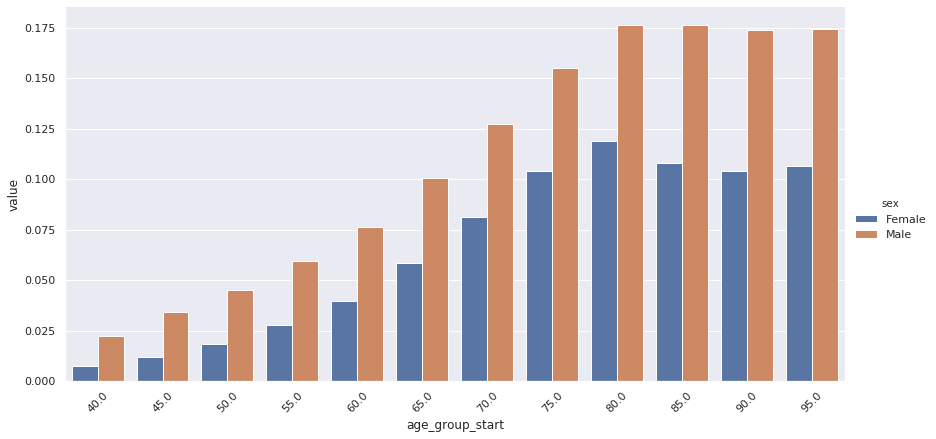

In [20]:
plot_prevalence_data()

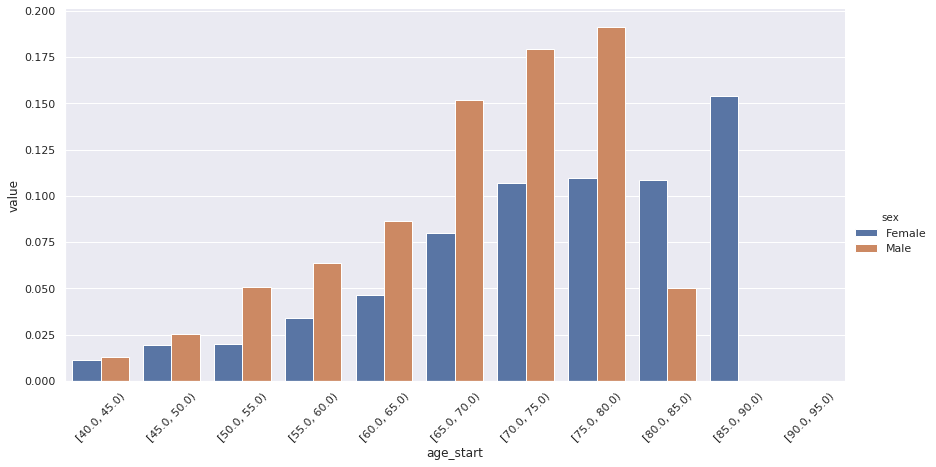

In [21]:
plot_prevalence_sim(sim)

We're no longer in count space, so we expect much wider variation here depending on how many people are in a particular bin. We mathc pretty well in the earlier age groups, but fail significantly in 80+.

**Slide**

But then again, we only have a handful of people in each age sex bin once they get that old, so our sample is simply not representative, which is unsurprising in a single simulation.

In [22]:
start_pop = sim.get_population()
len(start_pop[start_pop.age > 80])

90

### Cause Models - Dynamics


Equations for Drew

$$P(t < T_{disease} <= t + \Delta t \mid \textrm{Alive and Susceptible}) = 1 - e^{-i \Delta t} $$
$$i := \textrm{incidence rate} $$


### Cause Models - Relationships

Equations for Drew

$$\lambda \rightarrow \lambda - \textrm{CSMR} + \textrm{EM} * X$$
$$X = 1 \textrm{ if prevalent else } 0$$

Term for disability excluded because.

In [ ]:
sim.run()